In [0]:
from __future__ import print_function
%tensorflow_version 1.x
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM,Embedding,GRU,Flatten,SimpleRNN
from keras.optimizers import RMSprop
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
from keras.callbacks import TensorBoard

TensorFlow 1.x selected.


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading Data from datasets

In [0]:

train_set = '/content/drive/My Drive/Colab Notebooks/UNSW_NB15_testing-set.csv' #TRAINING DATA
test_set = '/content/drive/My Drive/Colab Notebooks/UNSW_NB15_training-set.csv'# TESTING DATA
data_training = pd.read_csv(train_set)
data_testing = pd.read_csv(test_set)
states = data_training["state"].unique()
protocols = data_training["proto"].unique()
attacks = data_training["attack_cat"].unique()

sta_tes = data_testing["state"].unique()

inter=[]                                               # Removing the categories which are present in test data but not in train data
for i in sta_tes:
  if i not in states:
    inter.append(i)
data_testing = data_testing[data_testing["state"]!="ACC"]    
data_testing = data_testing[data_testing["state"]!="CLO"]

Pre-Processing of the testing and training data.

In [0]:
label_encoder = LabelEncoder( )                        #Label Encoding the Categorical Data 
data_training = data_training[data_training["state"]!="nan"]
data_training = data_training[data_training["attack_cat"]!="nan"]

data_training["state"] = label_encoder.fit_transform(data_training["state"])
data_testing["state"] = label_encoder.transform(data_testing["state"])
data_training["attack_cat"].unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [0]:
label_encoder = LabelEncoder( )
data_training["proto"] = label_encoder.fit_transform(data_training["proto"])
data_testing["proto"] = label_encoder.transform(data_testing["proto"])

In [0]:
label_encoder = LabelEncoder( )
data_training["attack_cat"] = label_encoder.fit_transform(data_training["attack_cat"])
data_testing["attack_cat"] = label_encoder.transform(data_testing["attack_cat"])

In [0]:
data_training.drop(columns=["id","service"],inplace=True)
data_testing.drop(columns=["id","service"],inplace=True)


In [0]:
cols=data_training.columns                                  #Scaling the Data
cols=cols[:-2]
minmaxscaler = MinMaxScaler()
for i in cols:
  data_training[i] = minmaxscaler.fit_transform(data_training[i].values.reshape(-1,1))
  data_testing[i] = minmaxscaler.transform(data_testing[i].values.reshape(-1,1))

In [0]:
trainX=data_training.drop(columns=["attack_cat","label"],axis=1)
trainY=data_testing.drop(columns=["attack_cat","label"],axis=1)


In [0]:
class_names=attacks 

In [0]:
import io
import itertools
import pickle
import shutil

import numpy as np
import sklearn.metrics
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import keras
import os
from tensorflow.python.ops import array_ops

log_dir = '/content/drive/My Drive/Colab Notebooks/logs'
shutil.rmtree(log_dir)
os.makedirs(log_dir)


BUILDING THE RNN MODEL

In [0]:
logdir = '/content/drive/My Drive/Colab Notebooks/logs/RNN'
tensorboard_callback_RNN =TensorBoard(
    log_dir=logdir)
    


In [0]:
model_RNN = Sequential()
model_RNN.add(SimpleRNN(64, return_sequences=True, input_dim=41))  
model_RNN.add(Dropout(0.1))
model_RNN.add(SimpleRNN(64,return_sequences=True)) 
model_RNN.add(Dropout(0.1))
model_RNN.add(SimpleRNN(64, return_sequences=True))  
model_RNN.add(Dropout(0.1))
model_RNN.add(SimpleRNN(64, return_sequences=False)) 
model_RNN.add(Dropout(0.1))
#model.add(Flatten())
model_RNN.add(Dense(10,activation="sigmoid"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(64, return_sequences=True, input_shape=(None, 41))`
  


In [0]:
trainX = np.reshape(data_training.drop(columns=["attack_cat","label"]).values, (data_training.drop(columns=["attack_cat","label"]).shape[0], 1, data_training.drop(columns=["attack_cat","label"]).shape[1]))
testX = np.reshape(data_testing.drop(columns=["attack_cat","label"]).values, (data_testing.drop(columns=["attack_cat","label"]).shape[0], 1, data_testing.drop(columns=["attack_cat","label"]).shape[1]))
model_RNN.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_RNN.fit(trainX, data_training["attack_cat"], batch_size=100, nb_epoch=50, validation_data=(testX, data_testing["attack_cat"]),callbacks=[tensorboard_callback_RNN])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.



Train on 175341 samples, validate on 82327 samples


Epoch 1/50
175341/175341 [==============================] - 14s 81us/step - loss: 0.8234 - accuracy: 0.6890 - val_loss: 0.8248 - val_accuracy: 0.6412

Epoch 2/50
175341/175341 [==============================] - 12s 69us/step - loss: 0.6429 - accuracy: 0.7559 - val_loss: 0.8257 - val_accuracy: 0.6370
Epoch 3/50
175341/175341 [==============================] - 12s 67us/step - loss: 0.6024 - accuracy: 0.7689 - val_loss: 0.8529 - val_accuracy: 0.6370
Epoch 4/50
175341/175341 [==============================] - 12s 66us/step - loss: 0.5835 - accuracy: 0.7757 - val_loss: 0.8602 - val_accuracy: 0.6573
Epoch 5/50
175341/175341 [==============================] - 12s 67us/step - loss: 0.5721 - accuracy: 0.7793 - val_loss: 0.8433 - val_accuracy: 0.6712
Epoch 6/50
175341/175341 [==============================] - 12s 68us/step - loss: 0.5620 - accuracy: 0.7825 - val_loss: 0.8503 - val_accuracy: 0.6728
Epoch 7/50
175341/175341 [===================

BUILDING A GRU MODEL

In [0]:

tensorboard_callback_GRU = TensorBoard(
    log_dir='/content/drive/My Drive/Colab Notebooks/logs/GRU/'
    )

model_GRU =Sequential()
model_GRU.add(GRU(64,input_dim=41, return_sequences=True))  
model_GRU.add(Dropout(0.1))
model_GRU.add(GRU(64,return_sequences=True))  
model_GRU.add(Dropout(0.1))
model_GRU.add(GRU(64, return_sequences=True)) 
model_GRU.add(Dropout(0.1))
model_GRU.add(GRU(64, return_sequences=False))
model_GRU.add(Dropout(0.1))
model_GRU.add(Dense(10,activation="sigmoid"))


model_GRU.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_GRU.fit(trainX, data_training["attack_cat"], batch_size=100, nb_epoch=50, validation_data=(testX, data_testing["attack_cat"]),callbacks=[tensorboard_callback_GRU])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(64, return_sequences=True, input_shape=(None, 41))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 175341 samples, validate on 82327 samples
Epoch 1/50
175341/175341 [==============================] - 17s 100us/step - loss: 0.8958 - accuracy: 0.6597 - val_loss: 0.9706 - val_accuracy: 0.6195
Epoch 2/50
175341/175341 [==============================] - 16s 93us/step - loss: 0.6676 - accuracy: 0.7483 - val_loss: 0.8509 - val_accuracy: 0.6326
Epoch 3/50
175341/175341 [==============================] - 16s 94us/step - loss: 0.6049 - accuracy: 0.7684 - val_loss: 0.8453 - val_accuracy: 0.6498
Epoch 4/50
175341/175341 [==============================] - 16s 92us/step - loss: 0.5820 - accuracy: 0.7752 - val_loss: 0.9245 - val_accuracy: 0.6523
Epoch 5/50
175341/175341 [==============================] - 16s 94us/step - loss: 0.5695 - accuracy: 0.7796 - val_loss: 0.9560 - val_accuracy: 0.6684
Epoch 6/50
175341/175341 [==============================] - 16s 92us/step - loss: 0.5607 - accuracy: 0.7829 - val_loss: 0.8492 - val_accuracy: 0.6841
Epoch 7/50
175341/175341 [======================

BUILDING LSTM MODEL

In [0]:
tensorboard_callback_LSTM = keras.callbacks.TensorBoard(
    log_dir='/content/drive/My Drive/Colab Notebooks/logs/LSTM/'
)
model_LSTM = Sequential()
model_LSTM.add(LSTM(16,input_dim=41, return_sequences=True))  
model_LSTM.add(Dropout(0.1))
model_LSTM.add(LSTM(16, return_sequences=True))  
model_LSTM.add(Dropout(0.1))
model_LSTM.add(LSTM(16, return_sequences=False)) 
model_LSTM.add(Dropout(0.1))
model_LSTM.add(Dense(10,activation='sigmoid'))
trainX = np.reshape(data_training.drop(columns=["attack_cat","label"]).values, (data_training.drop(columns=["attack_cat","label"]).shape[0], 1, data_training.drop(columns=["attack_cat","label"]).shape[1]))
testX = np.reshape(data_testing.drop(columns=["attack_cat","label"]).values, (data_testing.drop(columns=["attack_cat","label"]).shape[0], 1, data_testing.drop(columns=["attack_cat","label"]).shape[1]))
model_LSTM.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_LSTM.fit(trainX, data_training["attack_cat"], batch_size=100, nb_epoch=50, validation_data=(testX, data_testing["attack_cat"]),callbacks=[tensorboard_callback_LSTM])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(16, return_sequences=True, input_shape=(None, 41))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 175341 samples, validate on 82327 samples
Epoch 1/50
  2800/175341 [..............................] - ETA: 1:10 - loss: 2.2927 - accuracy: 0.3532

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.120604). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


175341/175341 [==============================] - 16s 89us/step - loss: 1.4094 - accuracy: 0.4149 - val_loss: 1.2405 - val_accuracy: 0.5385
Epoch 2/50
175341/175341 [==============================] - 15s 84us/step - loss: 0.8744 - accuracy: 0.6789 - val_loss: 0.9798 - val_accuracy: 0.6013
Epoch 3/50
175341/175341 [==============================] - 14s 81us/step - loss: 0.7712 - accuracy: 0.7117 - val_loss: 1.0113 - val_accuracy: 0.5767
Epoch 4/50
175341/175341 [==============================] - 14s 82us/step - loss: 0.7257 - accuracy: 0.7232 - val_loss: 0.8537 - val_accuracy: 0.6475
Epoch 5/50
175341/175341 [==============================] - 14s 82us/step - loss: 0.6985 - accuracy: 0.7358 - val_loss: 0.8064 - val_accuracy: 0.6626
Epoch 6/50
175341/175341 [==============================] - 14s 81us/step - loss: 0.6734 - accuracy: 0.7469 - val_loss: 0.7803 - val_accuracy: 0.6709
Epoch 7/50
175341/175341 [==============================] - 14s 83us/step - loss: 0.6510 - accuracy: 0.7553 - v

BUILDING NEURAL NETWORK WITH 4 HIDDEN LAYERS

In [0]:
tensorboard_callback_DNN = keras.callbacks.TensorBoard(
    log_dir='/content/drive/My Drive/Colab Notebooks/logs/DNN/'
)
    

In [0]:
model_NN.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics =['accuracy'])
model_NN.fit(data_training.drop(columns=["label","attack_cat"]),data_training["attack_cat"],validation_data=[data_testing.drop(columns=["label","attack_cat"]),data_testing["attack_cat"]], batch_size=100, epochs=25,callbacks=[tensorboard_callback_DNN])

Train on 175341 samples, validate on 82327 samples
Epoch 1/25
175341/175341 [==============================] - 10s 57us/step - loss: 0.6626 - accuracy: 0.7417 - val_loss: 0.7155 - val_accuracy: 0.6697
Epoch 2/25
175341/175341 [==============================] - 10s 55us/step - loss: 0.5510 - accuracy: 0.7837 - val_loss: 0.7710 - val_accuracy: 0.6688
Epoch 3/25
175341/175341 [==============================] - 10s 55us/step - loss: 0.5301 - accuracy: 0.7908 - val_loss: 0.6516 - val_accuracy: 0.7150
Epoch 4/25
175341/175341 [==============================] - 10s 55us/step - loss: 0.5167 - accuracy: 0.7947 - val_loss: 0.8585 - val_accuracy: 0.6940
Epoch 5/25
175341/175341 [==============================] - 10s 54us/step - loss: 0.5085 - accuracy: 0.7975 - val_loss: 0.8078 - val_accuracy: 0.6929
Epoch 6/25
175341/175341 [==============================] - 10s 54us/step - loss: 0.5031 - accuracy: 0.7991 - val_loss: 0.7439 - val_accuracy: 0.7075
Epoch 7/25
175341/175341 [=======================

In [0]:
eval_model=model_RNN.evaluate(testX, data_testing["attack_cat"])
RNN_accuracy = eval_model[1]
eval_model

82327/82327 [==============================] - 6s 68us/step


[0.806837437726237, 0.714455783367157]

In [0]:
eval_model=model_GRU.evaluate(testX, data_testing["attack_cat"])
GRU_accuracy = eval_model[1]
eval_model

82327/82327 [==============================] - 7s 89us/step


[0.9015683481980232, 0.6994181871414185]

In [0]:
eval_model=model_LSTM.evaluate(testX, data_testing["attack_cat"])
LSTM_accuracy = eval_model[1]
eval_model

82327/82327 [==============================] - 6s 75us/step


[0.9481811981222784, 0.6630388498306274]

In [0]:
eval_model=model_NN.evaluate(data_testing.drop(columns=["label","attack_cat"]),data_testing["attack_cat"])
NN_accuracy = eval_model[1]
eval_model

82327/82327 [==============================] - 4s 47us/step


[0.8029234814119852, 0.7137512564659119]

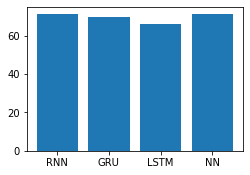

In [0]:
fig = plt.figure()
ax = fig.add_axes([0,0,.5,.5])
models = ['RNN', 'GRU','LSTM','NN']
AUCS = [RNN_accuracy*100,GRU_accuracy*100,LSTM_accuracy*100,NN_accuracy*100]
ax.bar(models,AUCS)
plt.show()


In [0]:
y_pred_RNN=model_RNN.predict_classes(testX)
y_pred_GRU=model_GRU.predict_classes(testX)

y_pred_LSTM=model_LSTM.predict_classes(testX)
y_pred_NN=model_NN.predict_classes(data_testing.drop(columns=["label","attack_cat"]))

In [0]:
y_test=data_testing["attack_cat"]

In [0]:
results=[]
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(y_test,y_pred_RNN)
prec=precision_score(y_test,y_pred_RNN,average='weighted',pos_label='positive')
rec=recall_score(y_test,y_pred_RNN,average='weighted',pos_label='positive')
f1=f1_score(y_test,y_pred_RNN,average='weighted',pos_label='positive')
results=pd.DataFrame([['RNN',acc,prec,rec,f1]],columns=['Model','Accuracy','Precision','Recall','F1 Score'])


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(y_test,y_pred_GRU)
prec=precision_score(y_test,y_pred_GRU,average='weighted',pos_label='positive')
rec=recall_score(y_test,y_pred_GRU,average='weighted',pos_label='positive')
f1=f1_score(y_test,y_pred_GRU,average='weighted',pos_label='positive')
model_results=pd.DataFrame([['GRU',acc,prec,rec,f1]],columns=['Model','Accuracy','Precision','Recall','F1 Score'])
results=results.append(model_results,ignore_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [0]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(y_test,y_pred_LSTM)
prec=precision_score(y_test,y_pred_LSTM,average='weighted',pos_label='positive')
rec=recall_score(y_test,y_pred_LSTM,average='weighted',pos_label='positive')
f1=f1_score(y_test,y_pred_LSTM,average='weighted',pos_label='positive')
model_results=pd.DataFrame([['LSTM',acc,prec,rec,f1]],columns=['Model','Accuracy','Precision','Recall','F1 Score'])
results=results.append(model_results,ignore_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(y_test,y_pred_NN)
prec=precision_score(y_test,y_pred_NN,average='weighted',pos_label='positive')
rec=recall_score(y_test,y_pred_NN,average='weighted',pos_label='positive')
f1=f1_score(y_test,y_pred_NN,average='weighted',pos_label='positive')
model_results=pd.DataFrame([['NN',acc,prec,rec,f1]],columns=['Model','Accuracy','Precision','Recall','F1 Score'])
results=results.append(model_results,ignore_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [0]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,RNN,0.714456,0.779771,0.714456,0.724569
1,GRU,0.699418,0.788402,0.699418,0.712300
2,LSTM,0.663039,0.799581,0.663039,0.688672
3,NN,0.713751,0.812777,0.713751,0.732652
